In [194]:
import math as m
import numpy as np
import matplotlib.pyplot as plt


In [195]:
v_max= [ 468.75 , 150, 165.79 , 750 ,750 ,300]
a_max = [ 3666.9 ,859.4 , 1152, 764, 4583.7 , 2291.8 ] 

pos_start = [0,0,0,0,0,0]
pos_end = [ 50, 30 ,45 ,70, 55 ,32]

In [196]:
tf=0
tf_max=0
index=0
for i in range(6):
    tf=(pos_end[i]-pos_start[i]/v_max[i]) +(v_max[i]/a_max[i])

    if (tf >tf_max):
        tf_max=tf
        index =i

print (" tf " +str(tf_max) + " index " + str(index) )   
              

 tf 70.98167539267016 index 3


In [197]:
n_acc= [0,0,0,0,0,0]
n_vel= [0,0,0,0,0,0]
t_c= [0,0,0,0,0,0]
for i in range(6):
    
    #print ("** i **  "+str(i))
    n_acc[i]= 6 *(abs(pos_end[i]-pos_start[i]))/(tf_max*tf_max)
    #print ("n_acc "+str(n_acc[i]))
    t_c[i] = (tf_max/2)-(0.5*m.sqrt(  (((tf_max*tf_max)*n_acc[i])-4*(pos_end[i]-pos_start[i]) )/  n_acc[i]                     ))
    #print ("tc "+str(t_c[i]))
    n_vel[i]=t_c[i]*n_acc[i]
    #print ("v "+str( n_vel[i]))




In [198]:
t=np.linspace(0,tf_max,1000)



q_dot=[[],[],[],[],[],[]]
q=[[],[],[],[],[],[]]

for i in range(6):
    for j in range(len(t)):
        if(t[j]<= t_c[i]):
            q_dot[i].append(n_acc[i]*t[j])

            q[i].append(pos_start[i]+(0.5*n_acc[i]*(t[j]*t[j])))

        if(t[j]>t_c[i] and t[j]<(tf_max-t_c[i])):
            q_dot[i].append( n_vel[i])

            q[i].append(pos_start[i]+(n_acc[i]*t_c[i]*(t[j]-t_c[i]/2)))

        if(t[j]>(tf_max-t_c[i])):
            q_dot[i].append(-n_acc[i]*(t[j]-tf_max))
            
            q[i].append(pos_end[i]-(0.5*n_acc[i]*((t[j]-tf_max)*(t[j]-tf_max))))
        





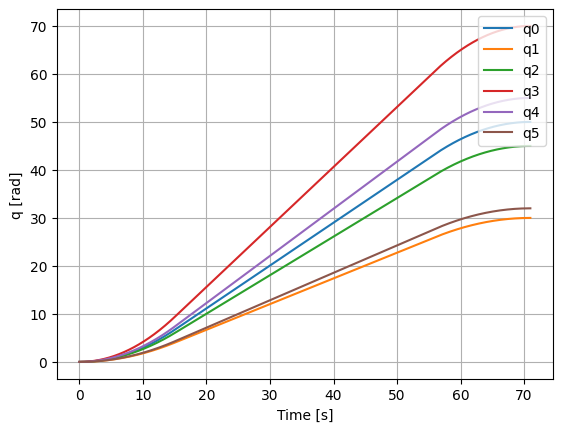

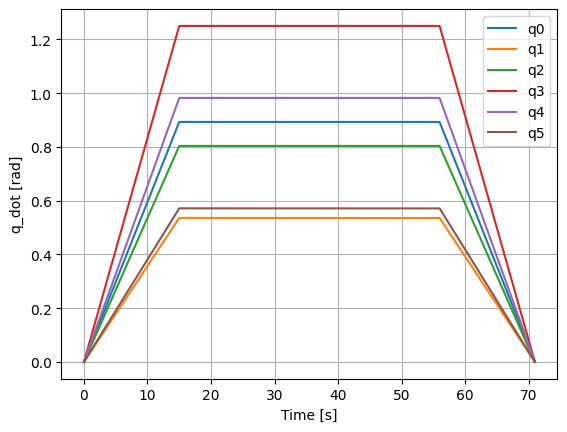

In [199]:
plt.figure()
for i in range(6):
    lab="q"+str(i)
    plt.plot(t,q[i],label=lab)
plt.grid(visible=True)
plt.xlabel("Time [s]")
plt.ylabel("q [rad]")
plt.legend(loc="upper right")
plt.draw()
#plt.savefig("erroreLineare.png",dpi=300, bbox_inches="tight")
plt.show()
plt.close()



plt.figure()
for i in range(6):
    lab="q"+str(i)
    plt.plot(t,q_dot[i],label=lab)
plt.grid(visible=True)
plt.xlabel("Time [s]")
plt.ylabel("q_dot [rad]")
plt.legend(loc="upper right")
plt.draw()
#plt.savefig("erroreLineare.png",dpi=300, bbox_inches="tight")
plt.show()
plt.close()


